In [1]:
#import modules 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator 

## Initialize The CNN

In [2]:
classifier = Sequential() #Empty Model

In [3]:
#1st hidden layer
classifier.add(Conv2D(32, (3,3), input_shape = (128,128,3), activation = "relu"))

In [4]:
classifier.add(MaxPooling2D(pool_size  =(2,2)))

In [5]:
# 2nd hidden layer
classifier.add(Conv2D(64, (3,3), activation="relu"))

In [6]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
#3rd hidden layer
classifier.add(Conv2D(128, (3,3), activation = "relu"))

In [8]:
classifier.add(MaxPooling2D(pool_size  =(2,2)))

In [9]:
classifier.add(Flatten()) 

## Fully connected Layer

In [10]:
classifier.add(Dense(128, activation = "relu" ))

In [11]:
classifier.add(Dense(3, activation = "softmax"))

In [12]:
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Fitting images with the Model

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                  )

In [14]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [15]:
training_dataset = train_datagen.flow_from_directory("dataset/training_set", target_size = (128,128), batch_size=32, class_mode = "categorical")
test_dataset  = test_datagen.flow_from_directory("dataset/test_set", target_size = (128,128), batch_size =32, class_mode ="categorical" )

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [16]:
history = classifier.fit(training_dataset, steps_per_epoch=800/32, epochs=35, validation_data= test_dataset, validation_steps=200/32)

Epoch 1/35
25/25 [==============================] - 40s 736ms/step - loss: 1.1723 - accuracy: 0.3426 - val_loss: 1.0823 - val_accuracy: 0.3929
Epoch 2/35
25/25 [==============================] - 18s 706ms/step - loss: 1.0761 - accuracy: 0.3727 - val_loss: 0.9799 - val_accuracy: 0.4955
Epoch 3/35
25/25 [==============================] - 18s 738ms/step - loss: 0.9403 - accuracy: 0.5135 - val_loss: 0.8539 - val_accuracy: 0.6161
Epoch 4/35
25/25 [==============================] - 18s 706ms/step - loss: 0.9107 - accuracy: 0.5389 - val_loss: 0.7649 - val_accuracy: 0.6741
Epoch 5/35
25/25 [==============================] - 18s 708ms/step - loss: 0.8040 - accuracy: 0.6172 - val_loss: 0.8777 - val_accuracy: 0.5670
Epoch 6/35
25/25 [==============================] - 18s 701ms/step - loss: 0.7707 - accuracy: 0.6479 - val_loss: 0.9357 - val_accuracy: 0.5491
Epoch 7/35
25/25 [==============================] - 18s 689ms/step - loss: 0.7415 - accuracy: 0.6452 - val_loss: 0.7168 - val_accuracy: 0.6696

In [17]:
import matplotlib.pyplot as plt

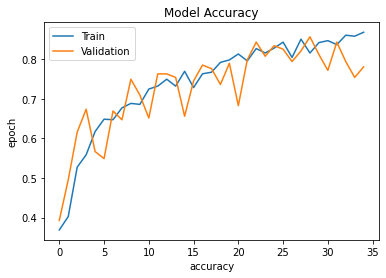

In [18]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("accuracy")
plt.ylabel("epoch")
plt.legend(['Train', 'Validation'],loc = "upper left")
plt.show()

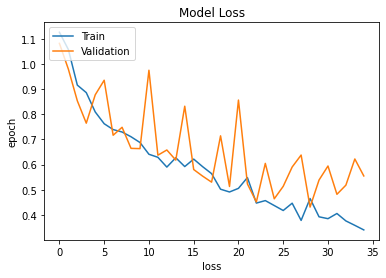

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("loss")
plt.ylabel("epoch")
plt.legend(['Train', 'Validation'], loc = "upper left")
plt.show()

In [20]:
import os
target_directory = "dataset/model/"
if not os.path.exists(target_directory):
    os.mkdir(target_directory)

In [21]:
classifier.save("dataset/model/model.h5")
classifier.save("dataset/model/weights.h5")

In [22]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model
from PIL import Image, ImageTk
from io import BytesIO
import requests
from tkinter import Tk, Label, Canvas, NW, Entry, Button
from keras.preprocessing import image as image_utils

In [23]:
#lOad model
image_width, image_height = 128, 128
model_path = "dataset/model/model.h5"
model_weight_path = "dataset/model/weights.h5"
model = load_model(model_path)
model.load_weights(model_weight_path)


In [24]:
url = ''
window = Tk()
window.title("Image Classification")
window.geometry("800x600")
lbl = Label(window, text = "Please Enter the image Url: ", font = ("Halvetica", 16))
lbl.pack()

def Enter():
    global url
    lbl.configure()
    url = (User_input.get())
    print(url)
    
    
    response = requests.get(url)
    test_image = Image.open(BytesIO(response.content))
    put_image = test_image.resize((100, 100))
    test_image = test_image.resize((128,128))
    
    img = ImageTk.PhotoImage(put_image)
    pic = Label(image = img)
    pic.pack()
    pic.image = img
    test_image = image_utils.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    
    result = model.predict_on_batch(test_image)
    
    if result[0][0] == 1:
        ans = "French Fries"
    elif result[0][1] == 1:
        ans = "pizza"
    elif result[0][2] == 1:
        ans = "samosa"
        
    out = Label(window, text = "Predicted Results: "+ans, font =("Halvetica", 16))
    out.pack()
        
    


In [25]:
User_input = Entry(width = 100)
User_input.pack()
button = Button(window, text = "Detect the image", font = ("Halvetica", 16), command = Enter)
button.pack()
window.mainloop()

https://media.istockphoto.com/photos/bunch-of-fried-french-fries-on-a-white-background-closeup-picture-id1130991737
https://i1.wp.com/spiceandcolour.com/wp-content/uploads/2020/06/receta-samosas-vegetales-01.jpg?w=1140&ssl=1
https://media.istockphoto.com/photos/picking-slice-of-pepperoni-pizza-picture-id1133727757?k=6&m=1133727757&s=612x612&w=0&h=6wLUhTKLTudlkgLXQxdOZIVr6D9zuIcMJhpgTVmOWMo=
